In [1]:
from pfinance_modules import pfinance_risk_kit as pfk 

In [2]:
hifi = pfk.get_hfi_returns() 
hifi

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01-31,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02-28,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03-31,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04-30,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05-31,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-31,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08-31,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09-30,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022


## Goal is to find if these hedge funds produce returns that are some what normal.

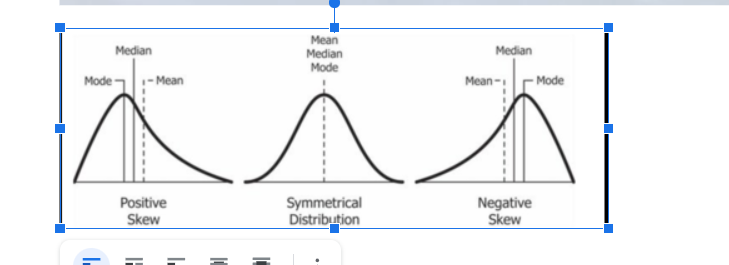

In [3]:
import pandas as pd 
pd.concat([hifi.mean(), hifi.median(), hifi.mean() > hifi.median()], axis = 1)

,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


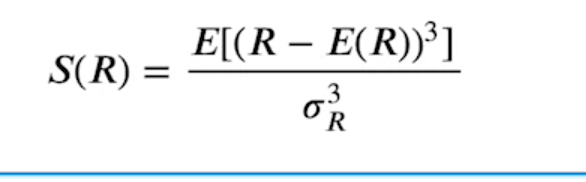

In [4]:
hifi.mean()

Convertible Arbitrage     0.005508
CTA Global                0.004074
Distressed Securities     0.006946
Emerging Markets          0.006253
Equity Market Neutral     0.004498
Event Driven              0.006344
Fixed Income Arbitrage    0.004365
Global Macro              0.005403
Long/Short Equity         0.006331
Merger Arbitrage          0.005356
Relative Value            0.005792
Short Selling            -0.001701
Funds Of Funds            0.004262
dtype: float64

In [5]:
pfk.skewness(hifi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [6]:
import scipy.stats as st 
import numpy as np 
normal_returns = np.random.normal(0,0.15,len(hifi))

In [7]:
pfk.skewness(normal_returns)

0.03853576583833794

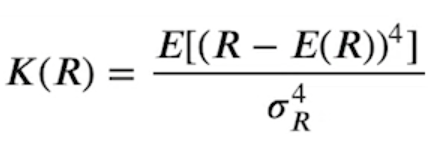

In [8]:
pfk.kurtosis(normal_returns) - 3

0.02186775793228657

In [9]:
pfk.kurtosis(hifi)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

In [10]:
st.kurtosis(normal_returns)

0.021867757932287013

JB test tests wether skweness and kurtosis follow normal distribution

In [11]:
st.jarque_bera(normal_returns).pvalue

0.965444660044104

In [12]:
st.jarque_bera(hifi['CTA Global']).pvalue

0.5099837302620382

In [13]:
pfk.is_normal(normal_returns)

True

In [14]:
pfk.is_normal(hifi['Funds Of Funds'])

False

In [15]:
# applying the normality function to each column 
hifi.apply(pfk.is_normal, axis = 0)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [16]:
ffme = pfk.get_ffme_returns()

In [17]:
ffme.apply(pfk.is_normal, axis = 0)

small_cap    False
large_cap    False
dtype: bool

In [18]:
pfk.skewness(ffme)

small_cap    4.410739
large_cap    0.233445
dtype: float64

In [19]:
from pfinance_modules import pfinance_risk_kit as pfk  
import numpy as np 
import pandas as pd 
%load_ext autoreload 
%autoreload 2 
import matplotlib.pyplot as plt 
%matplotlib widget 

In [20]:
hfi = pfk.get_hfi_returns() 
hfi 

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01-31,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02-28,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03-31,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04-30,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05-31,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-31,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08-31,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09-30,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022


In [21]:

hfi.std(ddof = 0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

### find the standard deviation for only those values whose returns is less than zero i.e. we are only concerned with negative returns. 


In [22]:
hfi[hfi < 0].std(ddof = 0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [23]:
pfk.semi_deviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

# VaR
- Historic Var
- Parametric VaR (Gaussian Parametric) 
- Modified Cornish-Fisher VaR 

## Historic VaR: We already have a history of returns so what is the value of risk at the 5% level. i.e we look at the historical values and we say what was 5 percentile returns. 

In [24]:
## find the fifth percentile on the zeroth axis 
np.percentile(hfi,5, axis = 0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

## Interpreting the VaR 
- looking at the above array the VaR value for Convertible Arbitrage is -0.01576 
- So there is 5% chance that in any given month we are going to loose about 1.5% or worse. 

In [25]:
def var_historic(r, level = 5): 
    """
    VaR Historic 
    """
    if isinstance(r, pd.DataFrame): 
        return r.apply(lambda x: np.percentile(x,5), axis = 0) * -1 
    elif isinstance(r, pd.Series): 
        return np.percentile(r,5) * -1 
    else:
        raise TypeError('Expected pandas Series or DataFrame') 
    
    

In [26]:
pfk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [27]:
pfk.var_historic(hfi['Short Selling'])

0.06783

In [28]:
pfk.var_historic(list(hfi['Short Selling']))

TypeError: Expected Pandas Series or a DataFrame

In [ ]:
import scipy.stats as st 
# this function norm.ppf takes the 5% level 
z = st.norm.ppf(0.05) 
z # this z score tells us exactly how far this is from the mean 

In [ ]:
st.norm.ppf(0.05, hfi.mean(), hfi.std()) * -1

In [55]:

comparision = pd.concat([pfk.var_parametric_gaussian(hfi),
pfk.var_parametric_cornsih_fisher(hfi),
pfk.var_historic(hfi)], axis = 1)
# so there is 5% chance that in any given month we are going to loose about 8% or worse 
# for short selling 
comparision.columns = ['gaussian','cornish-fisher','historic'] 
comparision
import seaborn as sns 
comparision.plot(kind = 'bar')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

Convertible Arbitrage    -0.021743
CTA Global               -0.034308
Distressed Securities    -0.021085
Emerging Markets         -0.047266
Equity Market Neutral    -0.008875
Event Driven             -0.021196
Fixed Income Arbitrage   -0.014615
Global Macro             -0.018813
Long/Short Equity        -0.026459
Merger Arbitrage         -0.010466
Relative Value           -0.013097
Short Selling            -0.080236
Funds Of Funds           -0.021341
dtype: float64

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [56]:
# Conditional Value At Risk 

In [59]:
pfk.var_historic(hfi) * -1

Convertible Arbitrage    -0.01576
CTA Global               -0.03169
Distressed Securities    -0.01966
Emerging Markets         -0.04247
Equity Market Neutral    -0.00814
Event Driven             -0.02535
Fixed Income Arbitrage   -0.00787
Global Macro             -0.01499
Long/Short Equity        -0.02598
Merger Arbitrage         -0.01047
Relative Value           -0.01174
Short Selling            -0.06783
Funds Of Funds           -0.02047
dtype: float64

In [64]:
hfi[hfi < pfk.var_historic(hfi) * -1].mean()  * -1

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

In [67]:
pfk.cvar_historic(hfi.iloc[:,1])

0.04126428571428571

In [68]:
pfk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

In [ ]:
# if thet five percent chance happens i.e worst 5% of the possible cases 
# the average of that is 3.6% loss 

In [1]:
from pfinance_modules import pfinance_risk_kit as pfk 
import pandas as pd 
import numpy as np 

In [6]:
df = pd.read_csv('D:/python-finance/coursera_finance/data/Portfolios_Formed_on_ME_monthly_EW.csv',
                 header = 0,
                 index_col = 0,
                 na_values = -99.99
                ) 
df = df[['Lo 20','Hi 20']]
df.columns = ['small_cap','large_cap'] 
df /= 100 
df.index = pd.to_datetime(df.index, format='%Y%m')
n_months = df.shape[0] 

In [14]:
monthly_returns = (df + 1).prod() ** (1/n_months) - 1

In [16]:
annualized_returns =((1 + monthly_returns) ** 12) - 1 
(annualized_returns*100).round(2)

small_cap    15.20
large_cap     9.85
dtype: float64

In [20]:
(df.std() * np.sqrt(12) * 100).round(2)

small_cap    33.67
large_cap    19.51
dtype: float64

In [25]:
timed_returns = df.loc['1999':'2015'] 
annualized_returns = (timed_returns + 1).prod() ** (12/timed_returns.shape[0]) - 1 
(annualized_returns * 100).round(2)


small_cap    11.44
large_cap     6.29
dtype: float64

In [27]:
(timed_returns.std() * np.sqrt(12) * 100).round(2)

small_cap    22.89
large_cap    17.27
dtype: float64

In [35]:
round(pfk.drawdown(timed_returns['small_cap'])['drawdown'].min() * -100,2)

62.48

In [38]:
pfk.drawdown(timed_returns['small_cap'])['drawdown'].idxmin()

Timestamp('2009-02-01 00:00:00')

In [39]:
round(pfk.drawdown(timed_returns['large_cap'])['drawdown'].min() * -100,2)

55.27

In [40]:
pfk.drawdown(timed_returns['large_cap'])['drawdown'].idxmin()

Timestamp('2009-02-01 00:00:00')

In [46]:
hfi = pfk.get_hfi_returns()
hfi = hfi['2009':'2018']
hfi 

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2009-01-31,0.0491,-0.0016,0.0082,-0.0112,0.0079,0.0132,0.0112,0.0029,-0.0017,0.0056,0.0100,0.0282,0.0060
2009-02-28,0.0164,-0.0031,-0.0122,-0.0133,-0.0046,-0.0091,0.0065,-0.0055,-0.0161,0.0006,-0.0016,0.0328,-0.0037
2009-03-31,0.0235,-0.0180,0.0022,0.0350,0.0021,0.0117,0.0057,0.0048,0.0188,0.0125,0.0100,-0.0462,0.0008
2009-04-30,0.0500,-0.0140,0.0387,0.0663,-0.0012,0.0337,0.0221,0.0127,0.0375,0.0081,0.0342,-0.0820,0.0092
2009-05-31,0.0578,0.0213,0.0504,0.0884,0.0146,0.0442,0.0365,0.0348,0.0516,0.0107,0.0392,0.0008,0.0312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-31,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08-31,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09-30,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2008-12-31,0.0177,0.0140,-0.0197,-0.0010,0.0005,-0.0071,-0.0035,0.0118,0.0081,0.0162,0.0031,-0.0146,-0.0119
2009-01-31,0.0491,-0.0016,0.0082,-0.0112,0.0079,0.0132,0.0112,0.0029,-0.0017,0.0056,0.0100,0.0282,0.0060
2009-02-28,0.0164,-0.0031,-0.0122,-0.0133,-0.0046,-0.0091,0.0065,-0.0055,-0.0161,0.0006,-0.0016,0.0328,-0.0037
2009-03-31,0.0235,-0.0180,0.0022,0.0350,0.0021,0.0117,0.0057,0.0048,0.0188,0.0125,0.0100,-0.0462,0.0008
2009-04-30,0.0500,-0.0140,0.0387,0.0663,-0.0012,0.0337,0.0221,0.0127,0.0375,0.0081,0.0342,-0.0820,0.0092
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-31,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08-31,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09-30,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022
